CNN MODEL CODE RETRIEVED FROM:
https://www.kaggle.com/code/sayakdasgupta/sign-language-classification-cnn-99-40-accuracy/notebook

In [1]:
#1. IMPORTING INITIAL NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
import matplotlib.pyplot as plt

In [2]:
#2. DATA PREPERATION / PREPROCESSING

#2.1 Importing the dataset:
with np.load('train_data_label.npz') as data:
    X_train = data['train_data']
    Y_train = data['train_label']

with np.load('test_data_label.npz') as data:
    X_test = data['test_data']
    Y_test = data['test_label']

In [3]:
#2.2 Checking the shape:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [4]:
#2.3 Splitting the training data set into a training and validation set:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 999)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

(20591, 784) (20591,) (6864, 784) (6864,) (7172, 784) (7172,)


In [5]:
#2.4 Reshaping the data:
X_train = X_train.reshape(-1, 28,28, 1)
print(X_train.shape)

X_val = X_val.reshape(-1, 28, 28, 1)
print(X_val.shape)

X_test = X_test.reshape(-1, 28, 28, 1)
print(X_test.shape)

(20591, 28, 28, 1)
(6864, 28, 28, 1)
(7172, 28, 28, 1)


In [6]:
#2.5 Converting the labels to binary form:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

Y_train = lb.fit_transform(Y_train)
Y_val = lb.fit_transform(Y_val)
Y_test = lb.fit_transform(Y_test)

In [7]:
#2.6 Checking the data after reshaping and binarizing:
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

(20591, 28, 28, 1) (20591, 24) (6864, 28, 28, 1) (6864, 24) (7172, 28, 28, 1) (7172, 24)


The CNN model consist of:

1. Three convolution layers - each followed by MaxPooling for better feature capture.
2. Dense layer of 512 units.
3. Output layer with 24 units for 24 different classes.

In [8]:
#3. BUILDING THE CNN MODEL

#3.1 Convolution layers:
model = Sequential()
model.add(Conv2D(128, kernel_size = (5, 5),
                 strides = 1, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D(pool_size = (3, 3), strides = 2, padding = 'same'))
model.add(Conv2D(64, kernel_size = (2, 2),
                strides = 1, activation = 'relu', padding = 'same'))
model.add(MaxPool2D((2, 2), 2, padding = 'same'))
model.add(Conv2D(32, kernel_size = (2, 2),
                strides = 1,activation = 'relu', padding = 'same'))
model.add(MaxPool2D((2, 2), 2, padding = 'same'))
          
model.add(Flatten())

2022-06-04 20:44:37.550680: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
#3.2 Dense and output layers:
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(rate = 0.25))

model.add(Dense(units = 24, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

In [10]:
#3.3 Adding the optimizer, loss and metric:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
#4. TRAINING THE CNN MODEL
history = model.fit(X_train, Y_train, batch_size = 64, epochs = 35, verbose = 2)

Epoch 1/35
322/322 - 66s - loss: 1.7683 - accuracy: 0.5160 - 66s/epoch - 205ms/step
Epoch 2/35
322/322 - 71s - loss: 0.2093 - accuracy: 0.9301 - 71s/epoch - 219ms/step
Epoch 3/35
322/322 - 69s - loss: 0.0658 - accuracy: 0.9779 - 69s/epoch - 215ms/step
Epoch 4/35
322/322 - 77s - loss: 0.0348 - accuracy: 0.9883 - 77s/epoch - 238ms/step
Epoch 5/35
322/322 - 76s - loss: 0.0468 - accuracy: 0.9852 - 76s/epoch - 237ms/step
Epoch 6/35
322/322 - 72s - loss: 0.0165 - accuracy: 0.9948 - 72s/epoch - 224ms/step
Epoch 7/35
322/322 - 77s - loss: 0.0672 - accuracy: 0.9795 - 77s/epoch - 239ms/step
Epoch 8/35
322/322 - 81s - loss: 0.0505 - accuracy: 0.9850 - 81s/epoch - 253ms/step
Epoch 9/35
322/322 - 61s - loss: 0.0422 - accuracy: 0.9870 - 61s/epoch - 191ms/step
Epoch 10/35
322/322 - 70s - loss: 0.0364 - accuracy: 0.9891 - 70s/epoch - 216ms/step
Epoch 11/35
322/322 - 75s - loss: 0.0083 - accuracy: 0.9973 - 75s/epoch - 232ms/step
Epoch 12/35
322/322 - 85s - loss: 0.0032 - accuracy: 0.9989 - 85s/epoch - 

HYPERPARAMETER TUNING CODE RETRIEVED FROM: https://www.projectpro.io/recipes/find-optimal-parameters-using-randomizedsearchcv-for-regression

In [12]:
#5. HYPERPARAMETER TUNING: GRID SEARCH ON BATCH SIZE AND EPOCHS
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from scipy.stats import randint

#5.1 Create function:
def create_model():
    tuned_model = Sequential()
    tuned_model.add(Conv2D(128, kernel_size = (5, 5),
                 strides = 1, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
    tuned_model.add(MaxPool2D(pool_size = (3, 3), strides = 2, padding = 'same'))
    tuned_model.add(Conv2D(64, kernel_size = (2, 2),
                strides = 1, activation = 'relu', padding = 'same'))
    tuned_model.add(MaxPool2D((2, 2), 2, padding = 'same'))
    tuned_model.add(Conv2D(32, kernel_size = (2, 2),
                strides = 1,activation = 'relu', padding = 'same'))
    tuned_model.add(MaxPool2D((2, 2), 2, padding = 'same'))
    tuned_model.add(Flatten())
    tuned_model.add(Dense(units = 512, activation = 'relu'))
    tuned_model.add(Dropout(rate = 0.25))
    tuned_model.add(Dense(units = 24, activation = 'softmax'))
    tuned_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return tuned_model

In [13]:
#5.2 Random seed:
seed = 10
np.random.seed(seed)

In [14]:
#5.3 Create model for hyperparameter tuning:
tuned_model = KerasClassifier(build_fn = create_model, verbose = 0)

/var/folders/98/kttfxt7d7f1fv3shp9t9wr3c0000gn/T/ipykernel_56904/3328085265.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  tuned_model = KerasClassifier(build_fn = create_model, verbose = 0)


In [15]:
#5.4 Defining the randomized search hyperparameters & executing the randomized search:
param_distributions = {'batch_size': randint.rvs(10, 100, size = 10),
                       'epochs': randint.rvs(10, 50, size = 5)
                      }

rs = RandomizedSearchCV(estimator = tuned_model,
                        param_distributions = param_distributions,
                        n_iter = 10,
                        n_jobs = -1,
                        cv = 3
                       )

rs_result = rs.fit(X_train, Y_train)

2022-06-04 21:27:15.643950: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-04 21:27:15.889298: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-04 21:27:15.891056: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

In [17]:
#5.5 Results randomized search:
print("\n The best score across ALL searched params:\n", rs_result.best_score_)
print("\n The best parameters across ALL searched params:\n", rs_result.best_params_)


 The best score across ALL searched params:
 0.9988344113032023

 The best parameters across ALL searched params:
 {'epochs': 26, 'batch_size': 25}


In [18]:
#5.6 Fitting the tuned model and testing it on the validation set:
tuned_history = tuned_model.fit(X_train, Y_train, batch_size = 25,
                                epochs = 26,
                                verbose = 2,
                                validation_data = (X_val, Y_val)
                               )

Epoch 1/26
824/824 - 60s - loss: 1.8929 - accuracy: 0.4298 - val_loss: 0.4666 - val_accuracy: 0.8460 - 60s/epoch - 73ms/step
Epoch 2/26
824/824 - 63s - loss: 0.3331 - accuracy: 0.8862 - val_loss: 0.0658 - val_accuracy: 0.9814 - 63s/epoch - 77ms/step
Epoch 3/26
824/824 - 65s - loss: 0.1581 - accuracy: 0.9475 - val_loss: 0.0903 - val_accuracy: 0.9688 - 65s/epoch - 79ms/step
Epoch 4/26
824/824 - 67s - loss: 0.1016 - accuracy: 0.9682 - val_loss: 0.0195 - val_accuracy: 0.9943 - 67s/epoch - 81ms/step
Epoch 5/26
824/824 - 59s - loss: 0.0938 - accuracy: 0.9703 - val_loss: 0.0091 - val_accuracy: 0.9978 - 59s/epoch - 72ms/step
Epoch 6/26
824/824 - 61s - loss: 0.0943 - accuracy: 0.9712 - val_loss: 0.0474 - val_accuracy: 0.9830 - 61s/epoch - 74ms/step
Epoch 7/26
824/824 - 57s - loss: 0.0728 - accuracy: 0.9784 - val_loss: 0.0465 - val_accuracy: 0.9856 - 57s/epoch - 69ms/step
Epoch 8/26
824/824 - 57s - loss: 0.0861 - accuracy: 0.9740 - val_loss: 0.0337 - val_accuracy: 0.9876 - 57s/epoch - 69ms/step


EVALUATION CODE RETRIEVED FROM: https://www.kaggle.com/code/gaurav3435/cnn-model/notebook

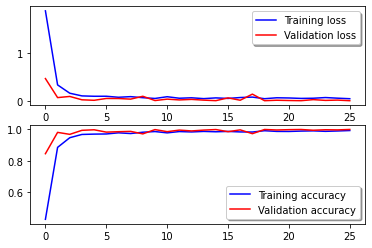

In [19]:
#6. EVALUATING THE CNN MODEL

#6.1 Plotting the accuracy / loss:
fig, ax = plt.subplots(2,1)

ax[0].plot(tuned_history.history['loss'],
           color='b', 
           label = "Training loss"
          )
ax[0].plot(tuned_history.history['val_loss'],
           color='r',
           label = "Validation loss",
           axes = ax[0]
          )
legend = ax[0].legend(loc = 'best', shadow = True)

ax[1].plot(tuned_history.history['accuracy'],
           color = 'b',
           label = "Training accuracy"
          )
ax[1].plot(tuned_history.history['val_accuracy'],
           color = 'r',
           label = "Validation accuracy"
          )
legend = ax[1].legend(loc = 'best', shadow = True)

In [56]:
#6.2 Predictions on the test set:
Y_pred = model.predict(X_test, batch_size = 25)

Y_pred_class = np.argmax(Y_pred, axis = 1)
Y_test_class = np.argmax(Y_test, axis = 1)

test_accuracy = np.mean(Y_pred_class == Y_test_class)

print("Test accuracy: ", test_accuracy, "\n")

287/287 [==============================] - 5s 19ms/step
Test accuracy:  0.9128555493586168 



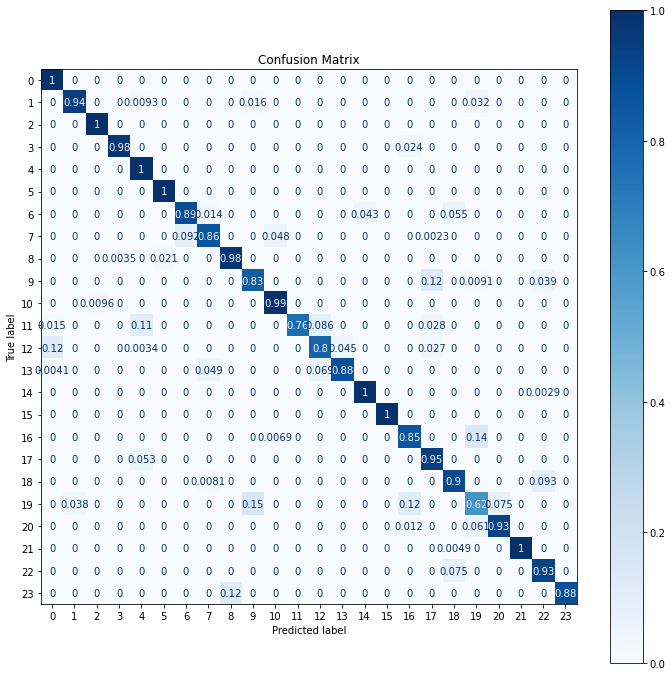

In [57]:
#6.3 Plotting the confusion matrix:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize = (12, 12))
cm = confusion_matrix(Y_test_class, Y_pred_class, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp = disp.plot(ax = ax,cmap = plt.cm.Blues)
ax.set_title("Confusion Matrix")
plt.show()

In [58]:
#6.4 Classification report:
from sklearn.metrics import classification_report

print(classification_report(Y_test_class, Y_pred_class))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       331
           1       0.98      0.94      0.96       432
           2       0.99      1.00      1.00       310
           3       1.00      0.98      0.99       245
           4       0.89      1.00      0.94       498
           5       0.98      1.00      0.99       247
           6       0.89      0.89      0.89       348
           7       0.95      0.86      0.90       436
           8       0.88      0.98      0.92       288
           9       0.85      0.83      0.84       331
          10       0.90      0.99      0.95       209
          11       1.00      0.76      0.87       394
          12       0.82      0.80      0.81       291
          13       0.94      0.88      0.91       246
          14       0.96      1.00      0.98       347
          15       1.00      1.00      1.00       164
          16       0.75      0.85      0.80       144
          17       0.79    